In [1]:
from sktime.datasets import load_from_tsfile
from preprocessing import get_paths, read_univariate_ts, random_sub_interval, TargetEncoder
import os
import numpy as np
from itertools import chain
import pandas as pd
import matplotlib.pyplot as plt

Number of classes:

In [2]:
sum(len(np.unique(load_from_tsfile(path)[1])) for path in get_paths())

1118

Distribution of lengths of the series.

In [3]:
lengths_of_datasets =[]
for path in get_paths():
    X, _ = load_from_tsfile(path)
    lengths_of_datasets += X.applymap(len).values.reshape(-1).tolist() 

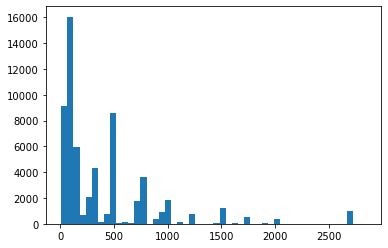

In [5]:
_=plt.hist(lengths_of_datasets, bins=50)